<a href="https://colab.research.google.com/github/goktuggokmen/Who-Will-Leave-The-Job-First/blob/main/Uygulama_5_Isten_Ilk_Kimler_Ayrilacak%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEM 314 Veri Madenciliğine Giriş**
# **Uygulama 5 : İşten İlk Kimler Ayrılacak?**

# **1. Kütüphanelerin Yüklenmesi**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image 

# **2. Verinin Dosyadan Okunması**

In [ ]:
dataset = pd.read_csv('HR.csv')
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# **3. Karar Ağaçları Ve Yapay Sinir Ağları Kullanılarak Farklı Modeller Geliştirme Ve Başarımlarını Karşılaştırma**

# 3.a. Karar Ağacı Kullanılarak Model Geliştirilmesi

In [ ]:
x = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]] #bağımsız değişkenler
y = dataset.iloc[:,[6]] #etiket değeri

In [ ]:
x #bağımsız değişkenler

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [ ]:
y #etiket değeri

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [ ]:
label_encoder = preprocessing.LabelEncoder() #string şeklindeki kolonlara sayısal değerler atanması
x['sales']= label_encoder.fit_transform(dataset['sales'])
x['sales'].unique()
x['salary']= label_encoder.fit_transform(dataset['salary'])
x['salary'].unique()
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [ ]:
#veriyi eğitim ve test verisi olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0) #verilerin %30'u test verisi olacak şekilde atanmıştır.
#x_train ve y_train‘i model eğitiminde x_test ve y_test ise modelin başarısını ölçerken kullanılacaktır.

In [ ]:
#karar ağacı oluşturma
d_tree1 = DecisionTreeClassifier(max_depth = 4)
d_tree1.fit(x_train, y_train)
y_pred = d_tree1.predict(x_test)
print("Başarı Oranı: %",metrics.accuracy_score(y_test, y_pred)*100) #y_test(gerçek değerler),y_pred(tahmin edilen değerler)

Başarı Oranı: % 96.64444444444445


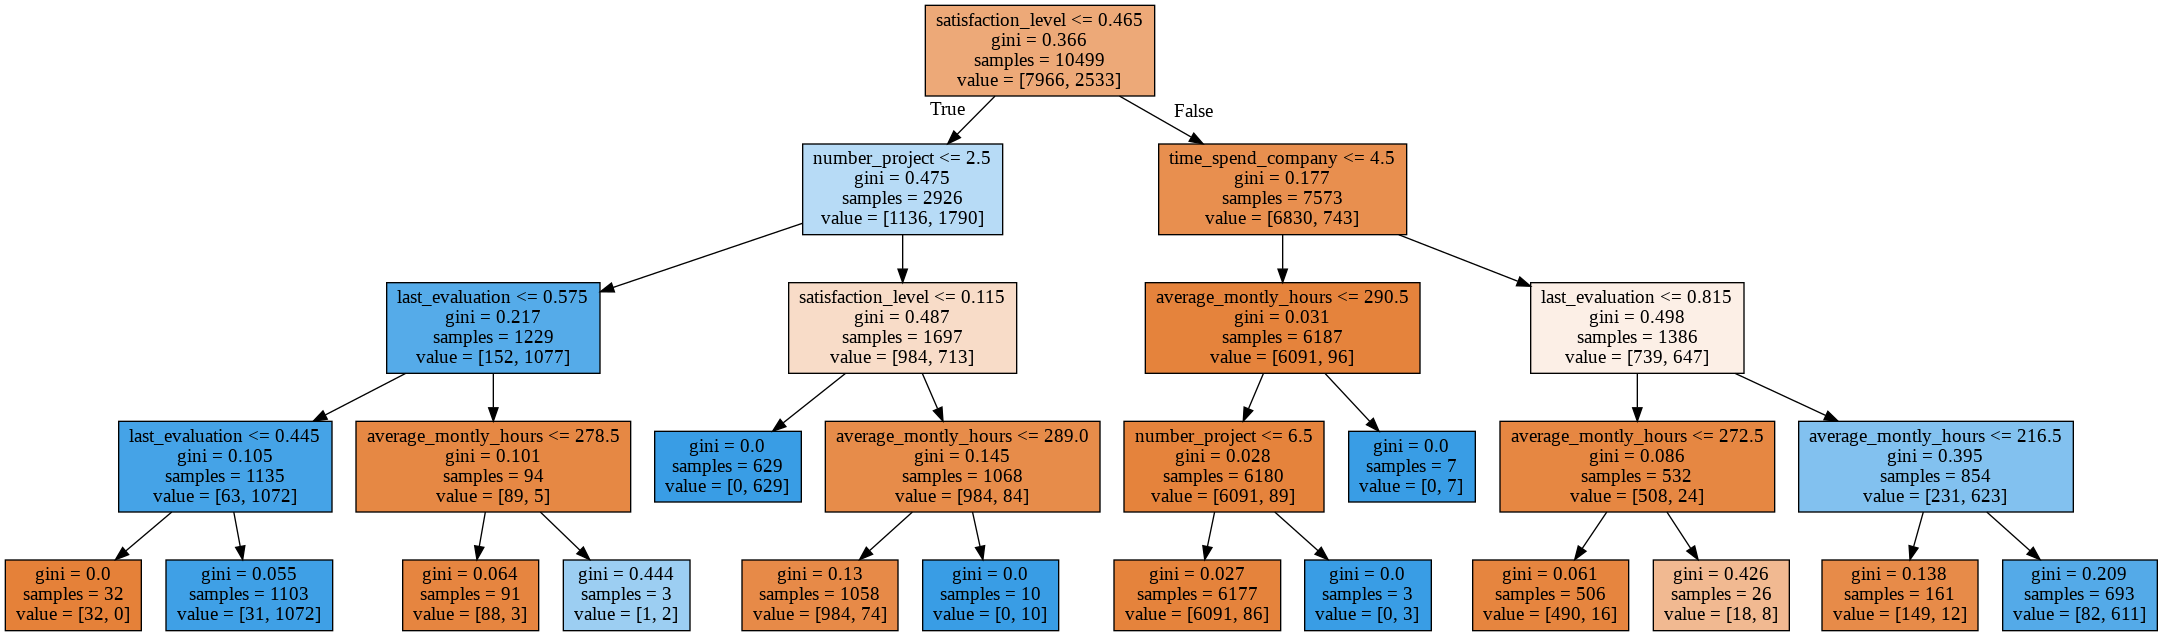

In [ ]:
#karar ağacının görselleştirilmesi
dot_data = StringIO()
export_graphviz(d_tree1, feature_names = x.columns,out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

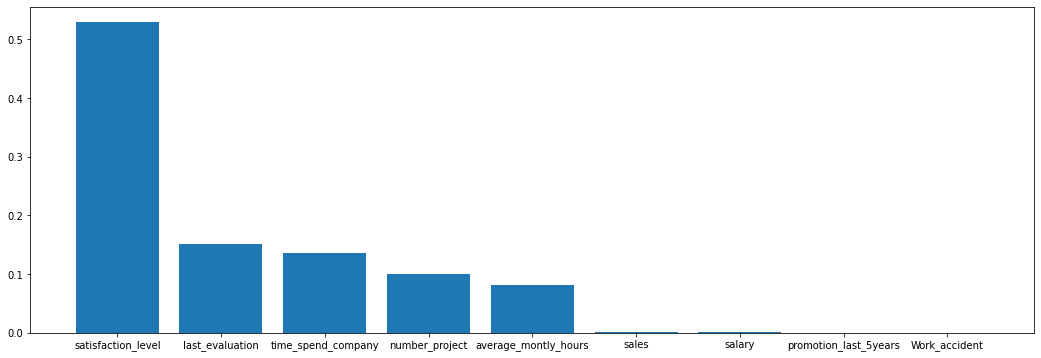

In [ ]:
#en etkili değişkenler 
plt.figure(figsize=(18, 6))
d_tree2 = DecisionTreeClassifier(max_depth=8, random_state=42)
d_tree2.fit(x_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = x.columns
plt.bar(range(len(features)), ranking[features], align="center")
plt.xticks(range(len(features)), columns[features])
plt.show()

# 3.b. Yapay Sinir Ağları Kullanılarak Model Geliştirilmesi

Bu işlemde belli bir kısma kadar karar ağaçlarında kullandığımız kodlardan yararlanacağız.

In [ ]:
#özellikleri ölçeklendirme (feature scaling)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#yapay sinir ağı modelimizi oluşturalım, gizli katmanımızı yapılandıralım
mlpcl = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000) #10’ar düğümden oluşan 4 katlı bir gizli katman ağı oluşturulur
mlpcl.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#test verileri üzerinde tahminde bulunma 
predictions = mlpcl.predict(x_test)

In [ ]:
#oluşturduğumuz algoritmanın performansının ölçümlenmesi
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3417   45]
 [ 107  931]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3462
           1       0.95      0.90      0.92      1038

    accuracy                           0.97      4500
   macro avg       0.96      0.94      0.95      4500
weighted avg       0.97      0.97      0.97      4500

